In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n=15
r = np.linspace(1,15,n)
Vtot = 4/3*np.pi*r**3
Vshell = Vtot[1:n]-Vtot[0:n-1]
print(Vshell)
print (r)

[  29.32153143   79.58701389  154.98523758  255.51620249  381.17990864
  531.97635601  707.90554461  908.96747444 1135.1621455  1386.48955778
 1662.9497113  1964.54260604 2291.26824202 2643.12661922]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15.]


In [3]:
nshell = 200*Vshell.astype('int32')
print(nshell)

[  5800  15800  30800  51000  76200 106200 141400 181600 227000 277200
 332400 392800 458200 528600]


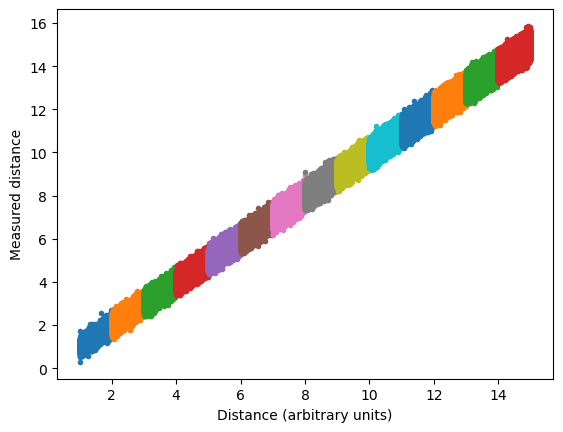

In [4]:
error = 0.2
dtrue_all=np.zeros([])
dmeasured_all = np.array([])
for i,rmin in enumerate(r[0:n-1]):
    rmax=r[i+1]
    dtrue = rmin + (rmax-rmin)*np.random.rand(nshell[i])  # Randomly assign distances within a bin
    dmeasured = dtrue + np.random.normal(scale=error,size=nshell[i])  # Add some error to those distances
    if i==0:
        dtrue_all = dtrue
        dmeasured_all = dmeasured
    else:
        dtrue_all = np.concatenate((dtrue_all,dtrue))
        dmeasured_all = np.concatenate((dmeasured_all,dmeasured))
    plt.plot(dtrue,dmeasured,'.')
plt.xlabel('Distance (arbitrary units)')
plt.ylabel('Measured distance')
plt.show()

1.5 0.08473466332669033
2.5 0.04775113351693694
3.5 0.0343150716534768
4.5 0.026327211688907504
5.5 0.01968764462479644
6.5 0.01908296538378984
7.5 0.015279478507809863
8.5 0.014575007499175285
9.5 0.01177621751519986
10.5 0.011852331550384676
11.5 0.010264631679925529
12.5 0.009239538717187301
13.5 0.008538760904057696
14.5 -0.02831590153571817


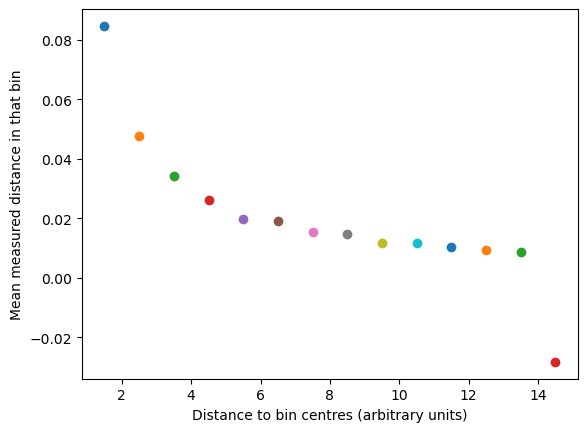

In [6]:
for i,rmin in enumerate(r[0:n-1]):
    rmax=r[i+1]
    tmp = dmeasured_all[dmeasured_all<rmax]
    rbin = tmp[tmp>=rmin]
    mean_measured = np.mean(rbin)
    bin_centre = rmin+(rmax-rmin)/2
    plt.plot(bin_centre,mean_measured-bin_centre,'o')
    print (bin_centre,mean_measured-bin_centre)
plt.xlabel('Distance to bin centres (arbitrary units)')
plt.ylabel('Mean measured distance in that bin')
plt.savefig('Volumetric_effect.png',dpi=360)
plt.show()